HW6 Problem 1. Kernel Ridge Regression. d) Implement Kernel Ridge Regression. Starter Code.

Generate training samples using the following code:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

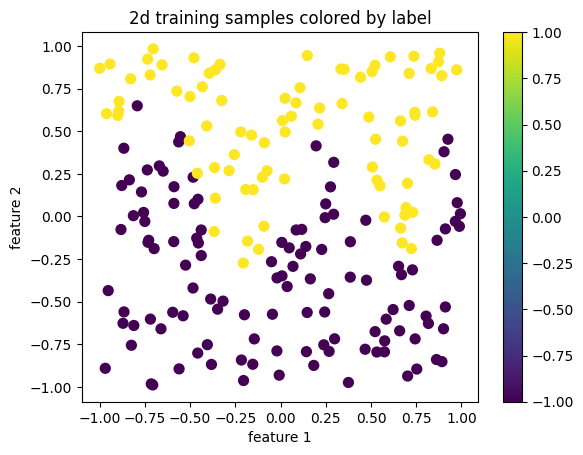

In [4]:
n = 200;
p = 2;
X = 2*(np.random.rand(n,p)-.5)
y = np.sign(X[:,1]-(X[:,0]**2/2+np.sin(X[:,0]*7)/2))

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], 50, c=y)
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('2d training samples colored by label')
plt.show()

Then train a kernel ridge regression classifier using a Gaussian kernel (recall Gaussian kernel $K(x_i, x_j) = e^{- \frac{\lVert x_i - x_j\rVert_2^2}{2\sigma^2}}$).
I suggest starting with $\lambda = 1$ and $\sigma^2 = .05$. Then vary $\sigma^2$; how does this affect your classifier? The following code may be helpful:

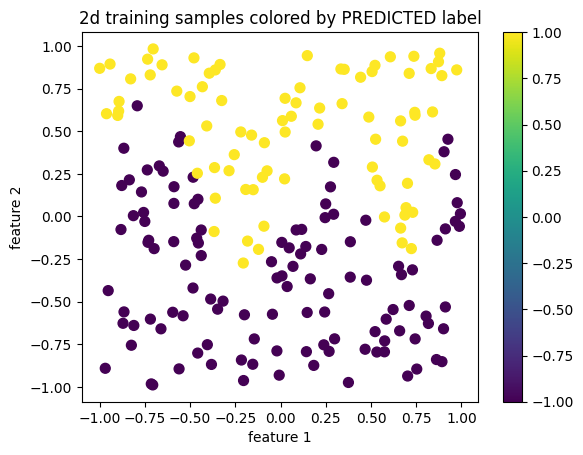

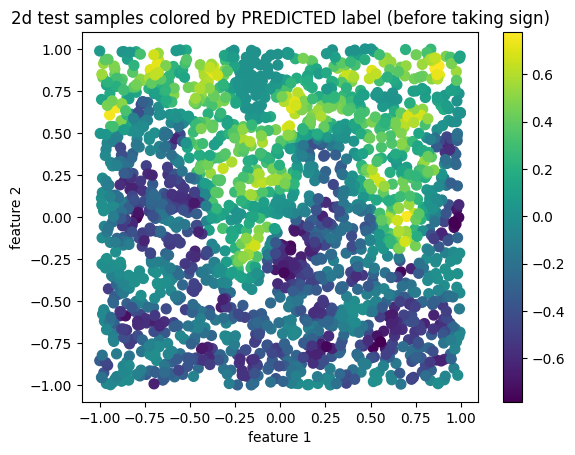

In [9]:
sigma = .05
lam = 1

### YOUR CODE STARTS HERE ###
pairwise_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(X**2, axis=1) - 2 * X @ X.T
K = np.exp(-pairwise_dists / (2 * sigma**2))
alpha = np.linalg.inv(K + lam * np.eye(n)) @ y
yhat = K @ alpha
### YOUR CODE ENDS HERE ###

y2 = np.array(np.sign(yhat))
plt.figure(2)
plt.scatter(X[:, 0], X[:, 1], 50, c=y2)
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('2d training samples colored by PREDICTED label')
plt.show()

ntest = 2000
Xtest = 2*(np.random.rand(ntest,p)-.5)

### YOUR CODE STARTS HERE ###
pairwise_dists_test = np.sum(Xtest**2, axis=1).reshape(-1, 1) + np.sum(X**2, axis=1) - 2 * Xtest @ X.T
K_test = np.exp(-pairwise_dists_test / (2 * sigma**2))
ytest = K_test @ alpha
### YOUR CODE ENDS HERE ###


plt.figure(3)
plt.scatter(Xtest[:,0], Xtest[:,1], 50, c=np.array(ytest))
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('2d test samples colored by PREDICTED label (before taking sign)')
plt.show()

The Gaussian kernel measures similarity between points using \( K(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right) \), where \(\sigma\) controls the kernel's bandwidth. For training, we compute the kernel matrix \(K\) from the training data, solve for the dual coefficients \(\alpha = (K + \lambda I)^{-1} y\) (with \(\lambda = 1\) for regularization), and predict training labels as \(\hat{y} = K \alpha\). For test data, we compute a new kernel matrix \(K_{\text{test}}\) between test and training points and predict \(\hat{y}_{\text{test}} = K_{\text{test}} \alpha\). The bandwidth \(\sigma\) significantly impacts the model: small \(\sigma\) (e.g., 0.01) leads to overfitting with complex boundaries, moderate \(\sigma\) (e.g., 0.05) balances flexibility and smoothness, and large \(\sigma\) (e.g., 1.0) causes underfitting with overly simplistic boundaries. The code visualizes these effects by plotting predictions before and after applying the sign function, demonstrating how \(\sigma\) influences the decision boundary's shape and generalization performance.